In [1]:
%load_ext autoreload
%autoreload 2

from PIL import Image
import numpy as np

In [2]:
from pathlib import Path

In [3]:
import torch
import torchvision
import time
import matplotlib.pyplot as plt

In [10]:
file = '../midia/sample1.jpeg'##### Select yout eq img ####

In [11]:
img = Image.open(file)

# Equirectangular Projection

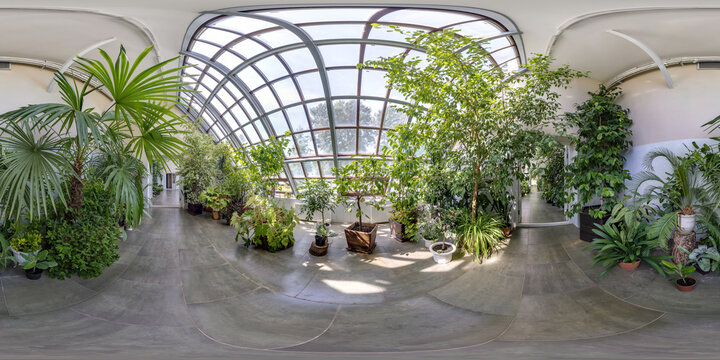

## Coordinate system

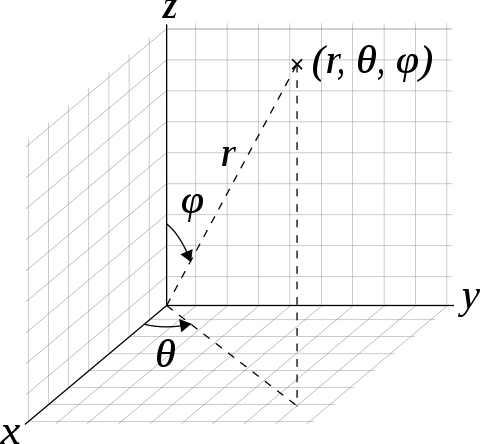

## Carthesian to Spherical

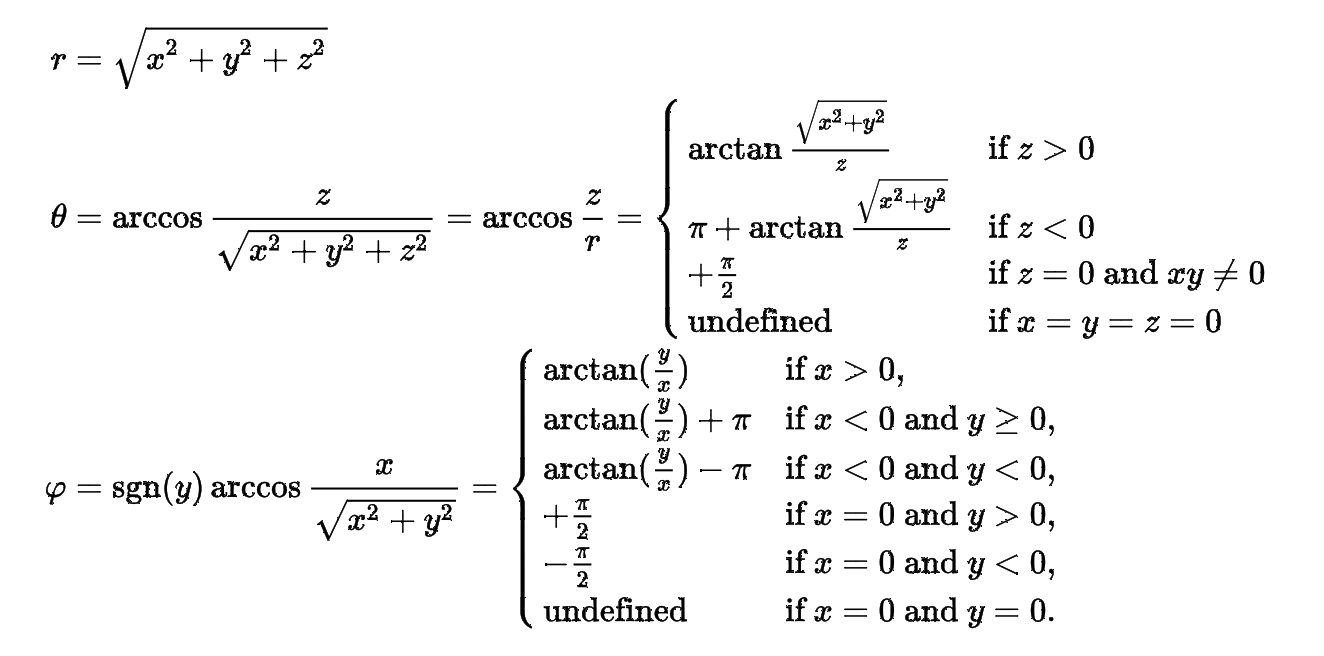

*phi and theta are misplaced on the following equations

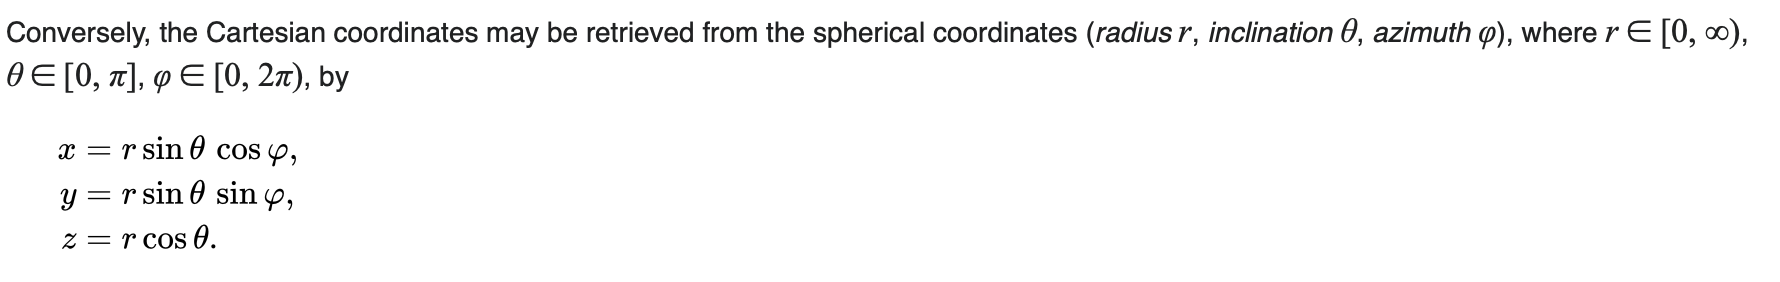

In [6]:
import algo360_projections as ap

# The EquirectProjection and Faces objects

### Load from file

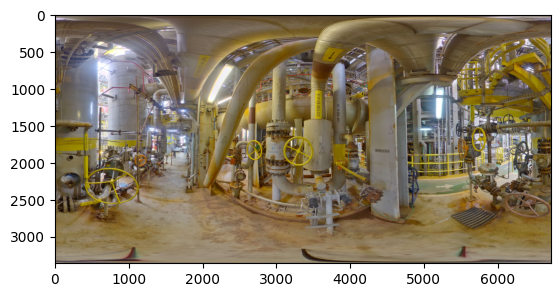

In [13]:
eq_img = ap.EquirectProjection.from_file(files[0])

plt.imshow(eq_img)

### Load from array

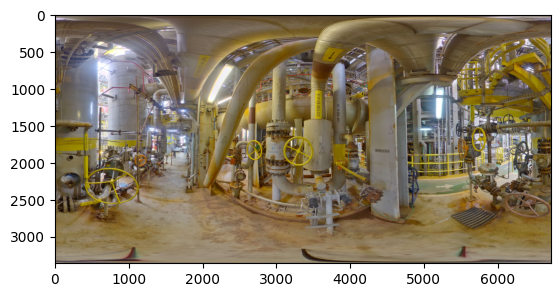

In [12]:
eq_img = ap.EquirectProjection(np.array(img))

plt.imshow(eq_img)

### Project to a batch of cubemap faces

In [14]:
faces = eq_img.cube()

In [15]:
np.asarray(faces).shape,faces[0].shape

((6, 1680, 1680, 3), (1680, 1680, 3))

### Project to a batch of icosahedro faces

In [20]:
faces = eq_img.ico(n=0)

In [21]:
np.asarray(faces).shape,faces[0].shape

((20, 1680, 1680, 3), (1680, 1680, 3))

In [ ]:
faces = eq_img.ico(n=1)

np.asarray(faces).shape,faces[0].shape

In [29]:
torch_faces = faces.torch()

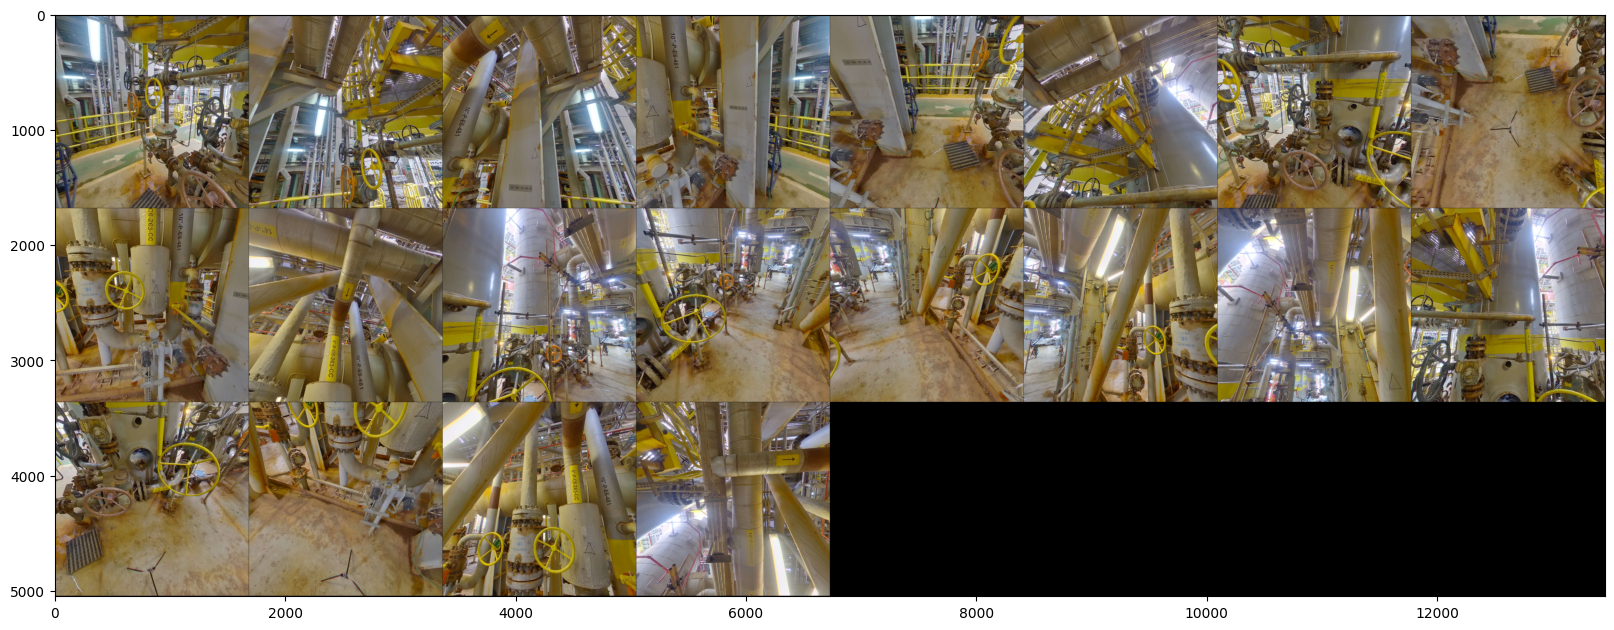

In [30]:
img_grid = torchvision.utils.make_grid(torch_faces).permute(1,2,0)

plt.figure(figsize=(20,20))
plt.imshow(img_grid)

In [33]:
# Phi and Lambda values for each face

print(faces.angles.shape)

(2, 20)

In [35]:
# x, y, z coordinates of the center of each face

print(faces.points.shape)

(3, 20)


### Retroproject faces to equirectangular

In [23]:
b_eq_img = faces.eq()

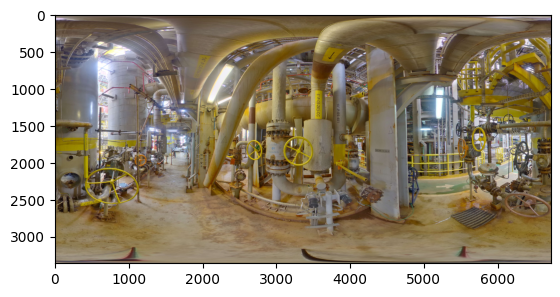

In [24]:
plt.imshow(b_eq_img)